<a href="https://colab.research.google.com/github/AkashB7/Self-Evolving-Neural-Network-Model-for-Multiclass-Classification/blob/main/MnistHandwrittenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

upload = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [ ]:
from google.colab import files

upload = files.upload()

Saving mnist_test.csv to mnist_test.csv


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2565 - accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1117 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0766 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0563 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0433 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0353 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0281 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0215 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0195 - accuracy: 0.9941
Epoch 10/10


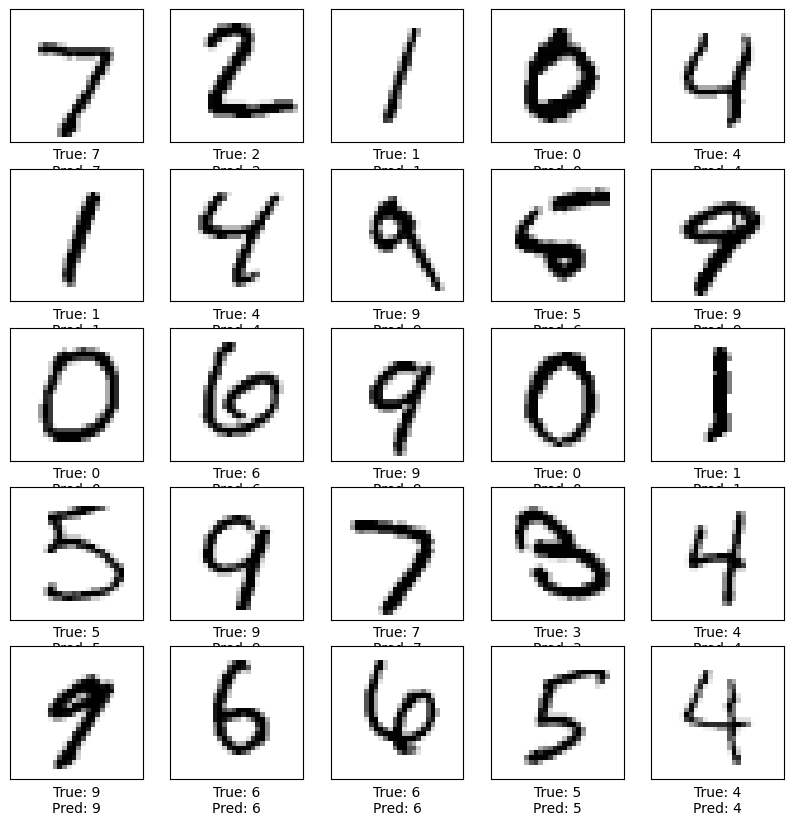

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

predictions = model.predict(test_images)
np.argmax(predictions[0])

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("True: " + str(test_labels[i]) + "\n" + "Pred: " + str(np.argmax(predictions[i])))
plt.show()

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5050 - accuracy: 0.6711
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7558 - accuracy: 0.8417
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5548 - accuracy: 0.8688
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4685 - accuracy: 0.8825
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4203 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3894 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3673 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3508 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3375 - accuracy: 0.9055
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3097 

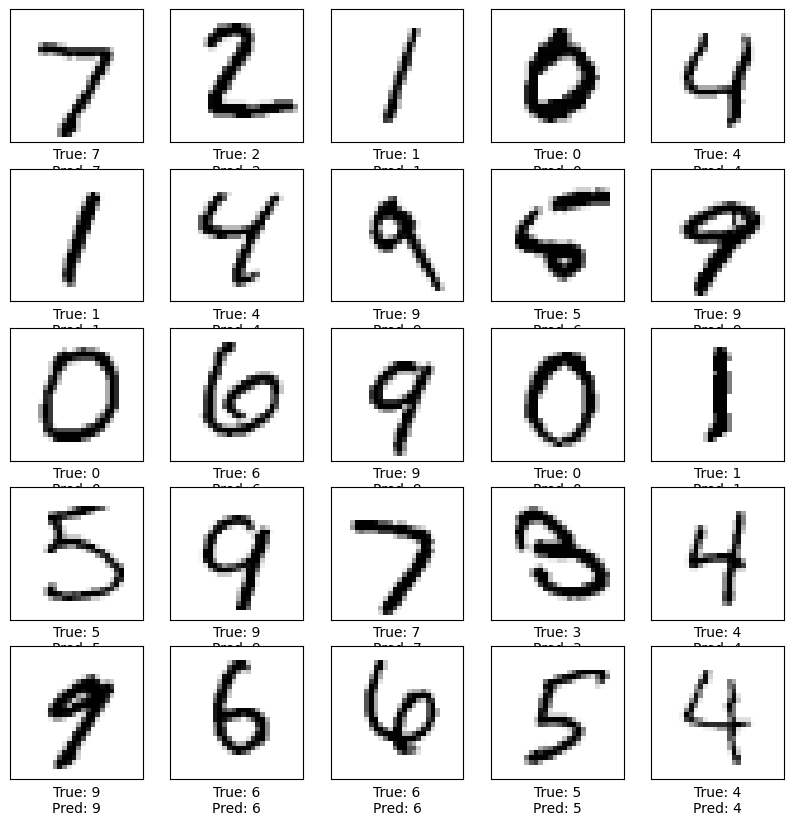

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(77, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

predictions = model.predict(test_images)
np.argmax(predictions[0])

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("True: " + str(test_labels[i]) + "\n" + "Pred: " + str(np.argmax(predictions[i])))
plt.show()

# New Section

In [ ]:
weights = model.get_weights()
print("Model Weights:")
for i, weight in enumerate(weights):
    print(f"Layer {i+1} weights shape: {weight.shape}")

Model Weights:
Layer 1 weights shape: (784, 128)
Layer 2 weights shape: (128,)
Layer 3 weights shape: (128, 10)
Layer 4 weights shape: (10,)


In [ ]:
input_index = 0
input_image = test_images[input_index]
prediction = model.predict(np.expand_dims(input_image, axis=0))
print("Model Output:")
print(prediction)

1/1 [==============================] - 0s 69ms/step
Model Output:
[[0.0812543  0.05698409 0.13055295 0.08551226 0.11404668 0.10904015
  0.11442932 0.12785736 0.07601818 0.10430461]]


In [ ]:
def model_fit(model, train_images, train_labels, epochs):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = model(train_images)
            loss_value = keras.losses.sparse_categorical_crossentropy(train_labels, predictions)

        grads = tape.gradient(loss_value, model.trainable_variables)
        model.optimizer.apply_gradients(zip(grads, model.trainable_variables))

        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(predictions, axis=1), train_labels), dtype=tf.float32))

        print(f"Epoch {epoch+1}/{epochs} - loss: {loss_value:.4f} - accuracy: {accuracy:.4f}")

In [ ]:
def model_predict(model, test_images):
    predictions = model(test_images)
    return predictions.numpy()

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2622 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1153 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0795 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0599 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0471 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0356 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0295 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0202 - accuracy: 0.9941
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 

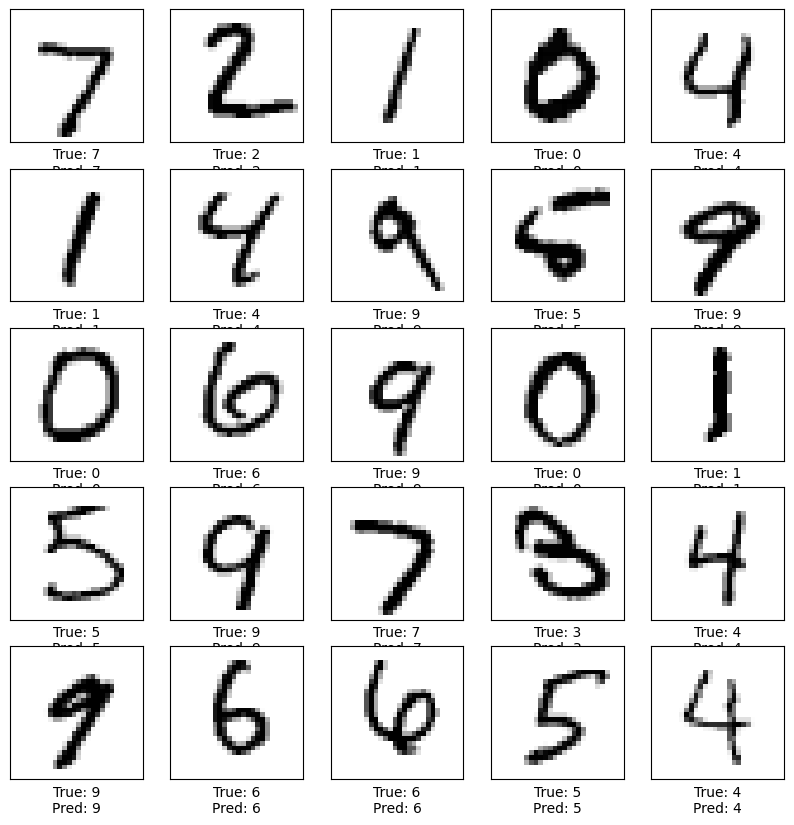

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

predictions = model_predict(model, test_images)
np.argmax(predictions[0])

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("True: " + str(test_labels[i]) + "\n" + "Pred: " + str(np.argmax(predictions[i])))
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

for layer in model.layers:
    print(layer.name)

flatten
dense
dense_1


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

def get_weights(model):
    all_weights = []
    for layer in model.layers:
        layer_weights = layer.get_weights()
        all_weights.append(layer_weights)
    return all_weights

weights = get_weights(model)

for i, layer_weights in enumerate(weights):
    print(f"Layer {i+1} weights:")
    for j, weight in enumerate(layer_weights):
        print(f"Weight {j+1}:")
        print(weight)
        print("\n")

Layer 1 weights:
Layer 2 weights:
Weight 1:
[[-0.00177943 -0.01284827 -0.0493251  ... -0.02088032 -0.06504091
  -0.05920635]
 [ 0.06365769  0.00550302 -0.06063311 ... -0.03287836 -0.07917415
   0.07099641]
 [-0.03384365  0.03774194  0.0478434  ... -0.01112329  0.02471698
  -0.02770542]
 ...
 [ 0.05767346  0.0345107  -0.00416437 ... -0.05360527 -0.07273605
   0.0682962 ]
 [-0.05112679 -0.01704259  0.00060923 ... -0.05497652  0.04693752
  -0.01351755]
 [ 0.02250475  0.02320115  0.0561984  ...  0.03659924 -0.00230313
   0.04381353]]


Weight 2:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


Layer 3 weights:
Weight 1:
[[ 0.11949994 -0.05211055  0.161

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

def set_weights(model, weights):
    model.set_weights(weights)
    print("Weights set successfully.")

weights = model.get_weights()
set_weights(model, weights)

Weights set successfully.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print("Initial weights of the first layer:")
print(model.layers[1].get_weights())

new_weights = [np.random.rand(*w.shape) for w in model.layers[1].get_weights()]
model.layers[1].set_weights(new_weights)

print("Updated weights of the first layer:")
print(model.layers[1].get_weights())

11490434/11490434 [==============================] - 1s 0us/step
Initial weights of the first layer:
[array([[ 0.07418656, -0.01542405, -0.06629986, ..., -0.04340166,
         0.01705093, -0.00163092],
       [ 0.00524491, -0.04022413,  0.06984446, ...,  0.02428908,
         0.06170607, -0.00328668],
       [ 0.02009294, -0.00235943,  0.00830601, ..., -0.07596955,
        -0.04216353,  0.01345444],
       ...,
       [ 0.03379316, -0.06203116, -0.06503078, ..., -0.03563643,
        -0.05059827, -0.07550103],
       [ 0.02761064, -0.04036899, -0.02603952, ..., -0.07295033,
        -0.06815244, -0.06309455],
       [-0.06402811,  0.06213116,  0.07063619, ...,  0.05766917,
         0.04926693, -0.00018447]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

new_weights_dense1 = np.random.randn(784, 256)

model.layers[1].set_weights([new_weights_dense1, np.zeros(256)])

print(model.layers[1].get_weights())

11490434/11490434 [==============================] - 0s 0us/step
[array([[-0.7090124 , -1.3716706 , -0.19966683, ...,  0.333635  ,
         0.43220854,  1.0440727 ],
       [ 0.643558  , -0.83881104,  0.41239312, ...,  0.8388686 ,
        -0.4358973 ,  0.7016584 ],
       [-0.5860252 , -1.785186  , -0.23984697, ..., -0.20568614,
        -0.03196473,  0.8184458 ],
       ...,
       [ 0.89477175, -1.1221998 , -0.90900874, ...,  0.32557496,
         1.0198007 , -0.9878659 ],
       [-0.01507841,  0.4624296 ,  1.6131248 , ...,  0.5479184 ,
        -0.40947288,  0.3079532 ],
       [-0.33457363,  0.70623964,  0.4358567 , ...,  0.8785709 ,
         0.67813504, -0.03018601]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     